In [15]:
import sklearn
import numpy as np
import sklearn.cluster
import sklearn.datasets
import matplotlib.pyplot as plt
seed = 0
np.random.seed(seed)

In [16]:
def draw_centers(centers,line_colors,marker):
    from scipy.spatial import Voronoi, voronoi_plot_2d
    voronoi_plot_2d(Voronoi(centers), plt.gca(), line_colors=line_colors)
    ax = plt.scatter(centers[:, 0],centers[:,1],label="KMeans Centers",marker=marker,color=line_colors)
    ax.set_zorder(99)
def draw_lines(centers1,centers2,sortkey=1):
    centers1 = sorted(centers1.tolist(),key = lambda x: x[sortkey])
    centers2 = sorted(centers2.tolist(),key = lambda x: x[sortkey])
    for i,(x1,y1),(x2,y2) in zip(range(len(centers2)),centers1,centers2):
        plt.plot([x1, x2],[y1, y2],label="Error" if i == 0 else "",color="green")

In [17]:
class CustomKmeans:
    def __init__(self, nclusters) -> None:
        self.nc = nclusters

    def fit(self, X,steps=10):
        nc = self.nc
        nf = X.shape[1]
        np.random.seed(seed)
        self.centers = np.random.randn(nc, nf)
        for _ in range(steps):
            a = np.sqrt(((X[:, None] - self.centers)**2).sum(-1))
            c_indices = a.argmin(-1)
            for c in range(self.centers.shape[0]):
                indices = np.where(c_indices == c)[0]
                mean = X[indices].mean(0)
                self.centers[c] = mean
        return self

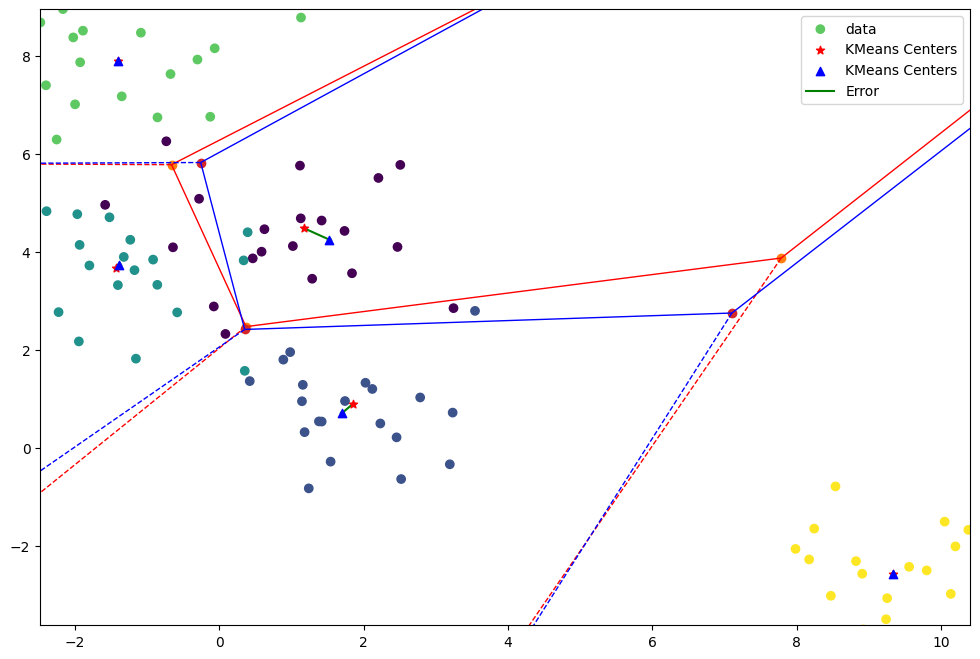

In [19]:
nclusters = 5
X, y = sklearn.datasets.make_blobs(n_samples=100,random_state=seed,centers=nclusters)
custom = CustomKmeans(nclusters).fit(X,30)
model = sklearn.cluster.KMeans(nclusters).fit(X)

plt.subplots(figsize=(12,8))
plt.scatter(X[:, 0], X[:,1],c=y,label="data")
draw_centers(model.cluster_centers_,"red","*")
draw_centers(custom.centers,"blue","^")
draw_lines(model.cluster_centers_,custom.centers)
plt.legend();